# 선형회귀 모델 (statsmodel)

In [52]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. 데이터 불러오기

In [53]:
df = pd.read_csv('C:/Users/Admin/Desktop/OSSP_final_data_filled_with_knn_with_LABEL.csv', encoding = 'cp949')

In [54]:
df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177
1,1,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257
2,2,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362
3,3,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308
4,4,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080


In [55]:
df.shape

(32912, 1508)

In [56]:
df.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '상권코드_0', '상권코드_1', '상권코드_2',
       '상권코드_3', '상권코드_4', '상권코드_5', '상권코드_6',
       ...
       '상권코드_1495', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률'],
      dtype='object', length=1508)

In [57]:
n_of_nulls = df.isnull().sum().sum()
print("결측치 수 : ", n_of_nulls)

결측치 수 :  0


## 2. 데이터 전처리
### (1) 데이터 정규화

In [58]:
# 사용할 column 추출
columns = ['총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률']

df_lm = df[columns]

In [59]:
df_lm.head()

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177
1,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257
2,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362
3,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308
4,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080


In [60]:
# min-max scaling 진행
df_lm_n = df_lm.copy()
for col in df_lm_n.columns:
    df_lm_n[col] = minmax_scaling(df_lm[col], columns=[0])

In [61]:
df_lm_n.head()

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0.009227,0.028620,0.286667,0.123935,0.001466,0.086149,0.257041,0.090966,0.045276
1,0.308615,0.044586,0.310105,0.222086,0.502015,0.407095,0.237704,0.139421,0.052960
2,0.411326,0.008493,0.135889,0.047209,0.117489,0.550676,0.398546,0.188385,0.036424
3,0.332637,0.014862,0.184669,0.100217,0.148205,0.277027,0.379175,0.034624,0.036878
4,0.383906,0.028620,0.286667,0.123935,0.067416,1.000000,0.579005,0.599629,0.037854


### (2) 데이터 분할

In [62]:
# 독립변수, 종속변수 설정
X = df_lm_n.drop('폐업률', axis = 1)
y = df_lm_n['폐업률']

In [63]:
# 학습 데이터, 검증 데이터 분할 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

## 3. 모델링

In [64]:
# 모델 생성
model1 = sm.OLS(y_train, X_train).fit()

In [65]:
# 모델링 결과

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    폐업률   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              7041.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                        0.00
Time:                        01:04:18   Log-Likelihood:                          45758.
No. Observations:               26329   AIC:                                 -9.150e+04
Df Residuals:                   26321   BIC:                                 -9.144e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
총_유동인구_수       0.0445      0.008      5.828      0.000       0.030       0.059
아파트_단지_수      -0.0138      0.005     -2.800      0.005      -0.023      -0.004
아파트_평균_면적      0.3170      0.004     78.081      0.000       0.309       0.325
아파트_평균_시가     -0.2166      0.008    -27.364      0.000      -0.232      -0.201
총 상주인구 수       0.0934      0.004     24.381      0.000       0.086       0.101
집객시설_수         0.0641      0.010      6.610      0.000       0.045       0.083
당월_매출_금액      -0.0439      0.008     -5.530      0.000      -0.059      -0.028
총_직장_인구_수     -0.0447      0.008     -5.701      0.000      -0.060      -0.029
==============================================================================
Omnibus:                    14258.111   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           485379.098
Skew:                           2.001   Prob(JB):                         0.00
Kurtosis:                      23.650   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 모델은 68% 정도의 설명력을 가짐
- 회귀모델은 통계적으로 유의함
- 회귀계수는 모두 통계적으로 유의함

## 4. 모델 성능확인

In [66]:
# 검증 데이터 예측
y_predict = model1.predict(X_test)

In [67]:
# 실제값 : 예측값 비교
y_compare = {'y_test' : y_test, 'y_predict' : y_predict}
pd.DataFrame(y_compare)

,y_test,y_predict
27091,0.086879,0.046385
128,0.000000,0.051115
17511,0.027926,0.076529
14891,0.000000,0.050445
20777,0.021605,0.045820
...,...,...
11147,0.019663,0.040051
6157,0.099756,0.055777
10685,0.028846,0.051302
14913,0.039238,0.034703


Text(0.5, 1.0, 'y_predict & y_test')

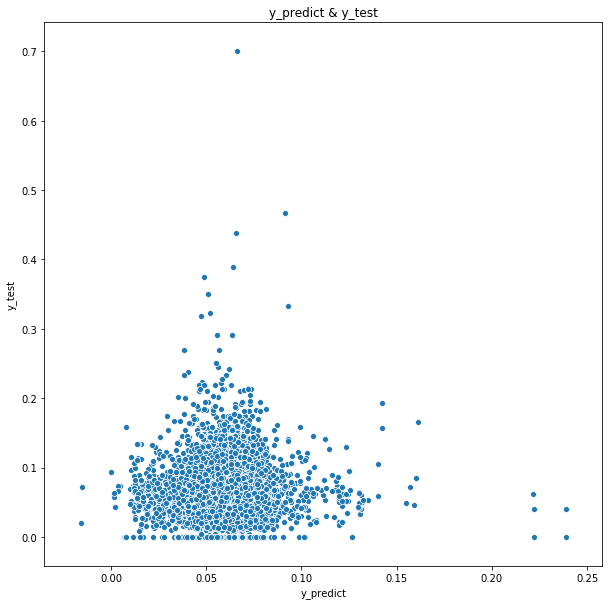

In [68]:
# 실제값 : 예측값 비교

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'y_predict', y = 'y_test', data = y_compare)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.title('y_predict & y_test')

In [69]:
# 훈련 데이터 RMSE

y_pred = model1.predict(X_train)
math.sqrt(mean_squared_error(y_train, y_pred))

0.042558299683371145

In [70]:
# 검증 데이터 RMSE

y_pred = model1.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

0.04196424283748791

## 5. model2

- 다중공선성을 일으켰던 '아파트 평균 면적' column 제거

In [75]:
df_lm_n_2 = df_lm_n.drop('아파트_평균_면적', axis = 1)

# 데이터 분할
X = df_lm_n_2.drop('폐업률', axis = 1)
y = df_lm_n_2['폐업률']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 20)

# 모델 학습
model2 = sm.OLS(y_train_2, X_train_2).fit()

In [76]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    폐업률   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              5827.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                        0.00
Time:                        01:09:54   Log-Likelihood:                          43016.
No. Observations:               26329   AIC:                                 -8.602e+04
Df Residuals:                   26322   BIC:                                 -8.596e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
총_유동인구_수       0.0427      0.008      5.045      0.000       0.026       0.059
아파트_단지_수      -0.0120      0.005     -2.190      0.029      -0.023      -0.001
아파트_평균_시가      0.3276      0.004     78.679      0.000       0.319       0.336
총 상주인구 수       0.2152      0.004     55.467      0.000       0.208       0.223
집객시설_수         0.0981      0.011      9.130      0.000       0.077       0.119
당월_매출_금액      -0.0444      0.009     -5.034      0.000      -0.062      -0.027
총_직장_인구_수     -0.0557      0.009     -6.409      0.000      -0.073      -0.039
==============================================================================
Omnibus:                    11142.079   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           262135.595
Skew:                           1.497   Prob(JB):                         0.00
Kurtosis:                      18.165   Cond. No.                         8.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 오히려 모델의 설명력이 떨어짐 0.68 >> 0.60
- '아파트_단지_수' 항목의 p-value가 상승함

## 6. model2 성능확인

In [77]:
# 검증 데이터 예측

y_predict = model2.predict(X_test_2)

In [78]:
# 실제값 : 예측값 비교
y_compare = {'y_test' : y_test_2, 'y_predict' : y_predict}
pd.DataFrame(y_compare)

,y_test,y_predict
27091,0.086879,0.038674
128,0.000000,0.015606
17511,0.027926,0.060981
14891,0.000000,0.055575
20777,0.021605,0.037337
...,...,...
11147,0.019663,0.055291
6157,0.099756,0.041604
10685,0.028846,0.053543
14913,0.039238,0.039430


Text(0.5, 1.0, 'y_predict & y_test_2')

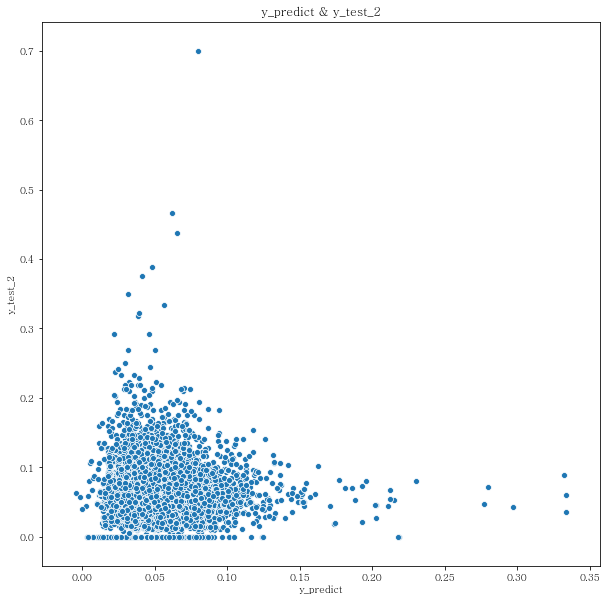

In [79]:
# 실제값 : 예측값 비교

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'y_predict', y = 'y_test', data = y_compare)
plt.xlabel('y_predict')
plt.ylabel('y_test_2')
plt.title('y_predict & y_test_2')

In [81]:
# 훈련 데이터 RMSE
y_pred = model2.predict(X_train_2)
math.sqrt(mean_squared_error(y_train_2, y_pred))

0.04723064515547441

In [82]:
# 검증 데이터 RMSE

y_pred = model2.predict(X_test_2)
math.sqrt(mean_squared_error(y_test_2, y_pred))

0.046947648435157724

- model1에 비해 RMSE도 약간 커짐  